## Naive Bayes

In [4]:
#Loading required packages
library(tidyverse)
library(ggplot2)
library(caret)
library(psych)
library(rpart)
# install.packages("randomForest")
library(randomForest)
# install.packages("Amelia")
library(Amelia)
library(mice)
library(e1071)
# install.packages("klaR")
library(klaR)

### This example comes from [https://www.edureka.co/blog/naive-bayes-in-r/](https://www.edureka.co/blog/naive-bayes-in-r/)

### For a very nice manuall python tutorial see [https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/)

In [5]:
diabetes = read.csv("diabetes.csv", header = T)
str(diabetes)

'data.frame':	2000 obs. of  9 variables:
 $ Pregnancies             : int  2 0 0 0 1 0 4 8 2 2 ...
 $ Glucose                 : int  138 84 145 135 139 173 99 194 83 89 ...
 $ BloodPressure           : int  62 82 0 68 62 78 72 80 65 90 ...
 $ SkinThickness           : int  35 31 0 42 41 32 17 0 28 30 ...
 $ Insulin                 : int  0 125 0 250 480 265 0 0 66 0 ...
 $ BMI                     : num  33.6 38.2 44.2 42.3 40.7 46.5 25.6 26.1 36.8 33.5 ...
 $ DiabetesPedigreeFunction: num  0.127 0.233 0.63 0.365 0.536 ...
 $ Age                     : int  47 23 31 24 21 58 28 67 24 42 ...
 $ Outcome                 : int  1 0 1 1 0 0 0 0 0 0 ...


In [6]:
describe(diabetes)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pregnancies,1,2000,3.70350,3.3060630,3.000,3.2981250,2.9652000,0.000,17.00,17.000,0.9808925,0.4024401,0.073925817
Glucose,2,2000,121.18250,32.0686356,117.000,119.7112500,29.6520000,0.000,199.00,199.000,0.1585677,0.5524171,0.717076493
BloodPressure,3,2000,69.14550,19.1883148,72.000,71.3293750,11.8608000,0.000,122.00,122.000,-1.8516952,5.3038693,0.429063763
SkinThickness,4,2000,20.93500,16.1032429,23.000,20.3468750,17.7912000,0.000,110.00,110.000,0.2069174,0.1490412,0.360079458
Insulin,5,2000,80.25400,111.1805335,40.000,58.4318750,59.3040000,0.000,744.00,744.000,1.9930912,5.1043410,2.486072308
BMI,6,2000,32.19300,8.1499007,32.300,32.0711875,6.9682200,0.000,80.60,80.600,-0.0903197,4.1112849,0.182237320
DiabetesPedigreeFunction,7,2000,0.47093,0.3235526,0.376,0.4224337,0.2490768,0.078,2.42,2.342,1.8092618,4.9833437,0.007234855
Age,8,2000,33.09050,11.7864231,29.000,31.3187500,10.3782000,21.000,81.00,60.000,1.1794959,0.8174996,0.263552433
Outcome,9,2000,0.34200,0.4744982,0.000,0.3025000,0.0000000,0.000,1.00,1.000,0.6656337,-1.5577099,0.010610103


In [7]:
#Convert '0' values into NA
diabetes[, 2:7][diabetes[, 2:7] == 0] <- NA

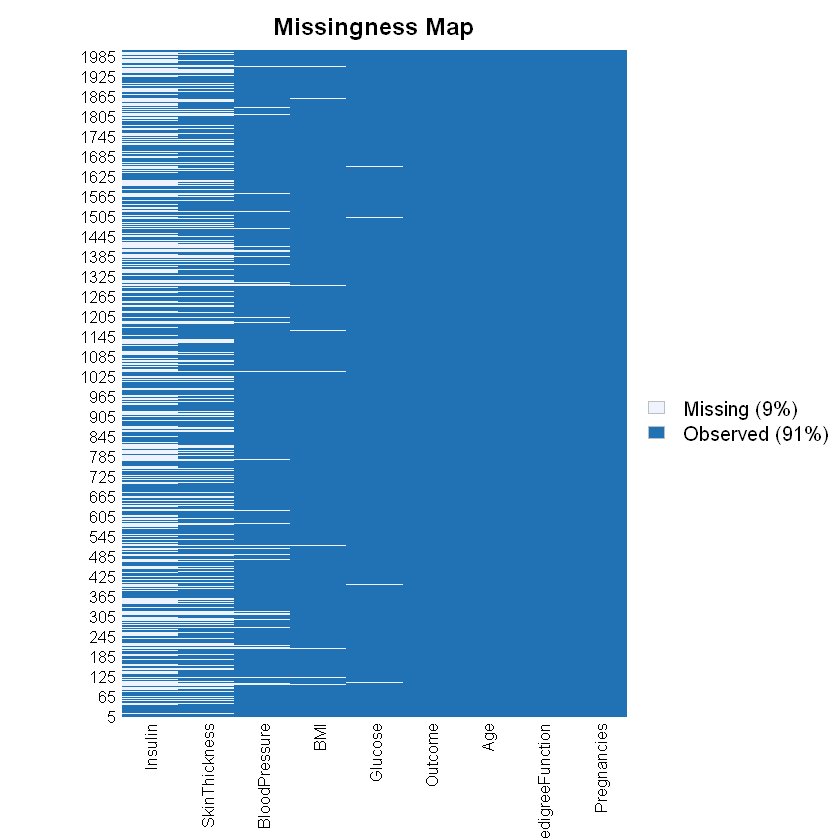

In [8]:
#visualize the missing data
missmap(diabetes)

In [9]:
###We can impute missing values using different techniques (k-mers, nearest neighbors)
mice_mod <- mice(diabetes[, c("Glucose","BloodPressure","SkinThickness","Insulin","BMI")], method='rf')
mice_complete <- complete(mice_mod)


 iter imp variable
  1   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  4   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  4 

In [10]:
#Transfer the predicted missing values into the main diabetes set
diabetes$Glucose <- mice_complete$Glucose
diabetes$BloodPressure <- mice_complete$BloodPressure
diabetes$SkinThickness <- mice_complete$SkinThickness
diabetes$Insulin<- mice_complete$Insulin
diabetes$BMI <- mice_complete$BMI



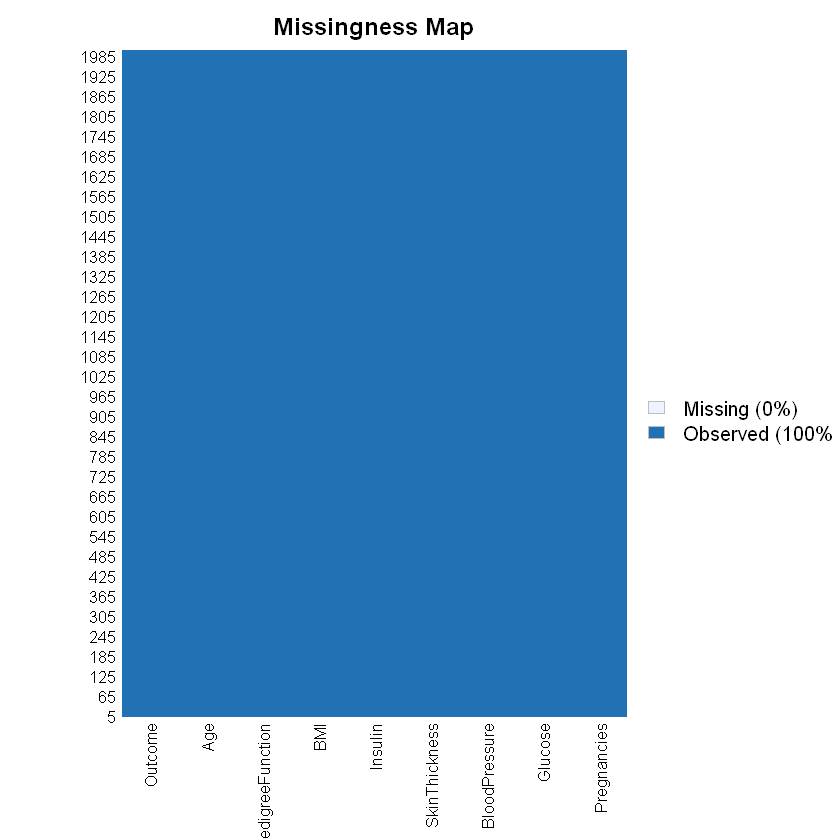

In [11]:
missmap(diabetes)

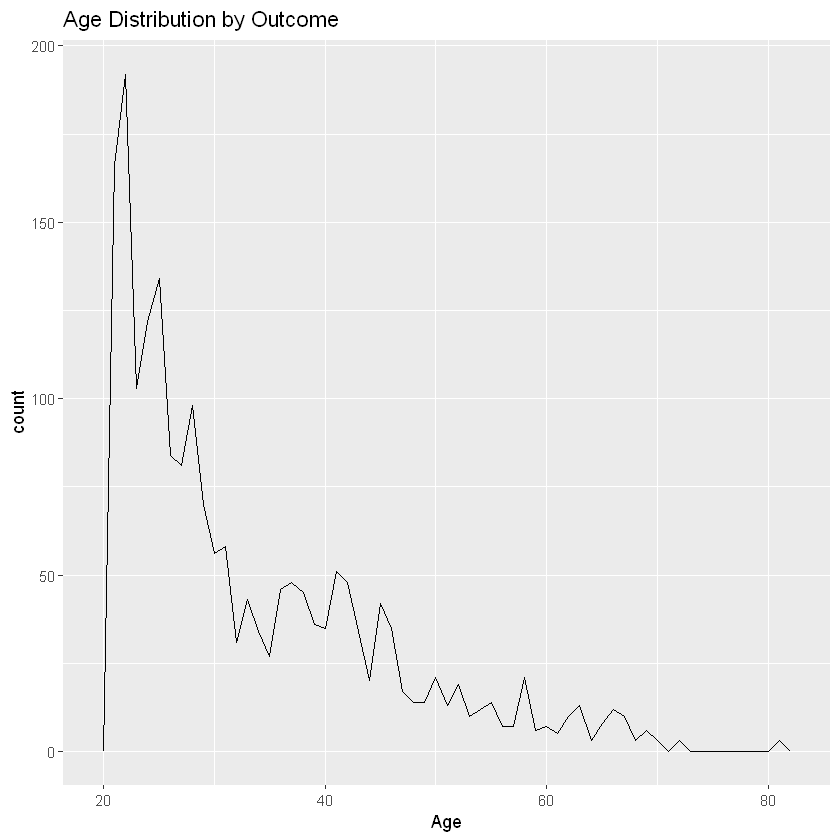

In [12]:
#Data Visualization
ggplot(diabetes, aes(Age, colour = Outcome)) +
  geom_freqpoly(binwidth = 1) + 
  labs(title="Age Distribution by Outcome")

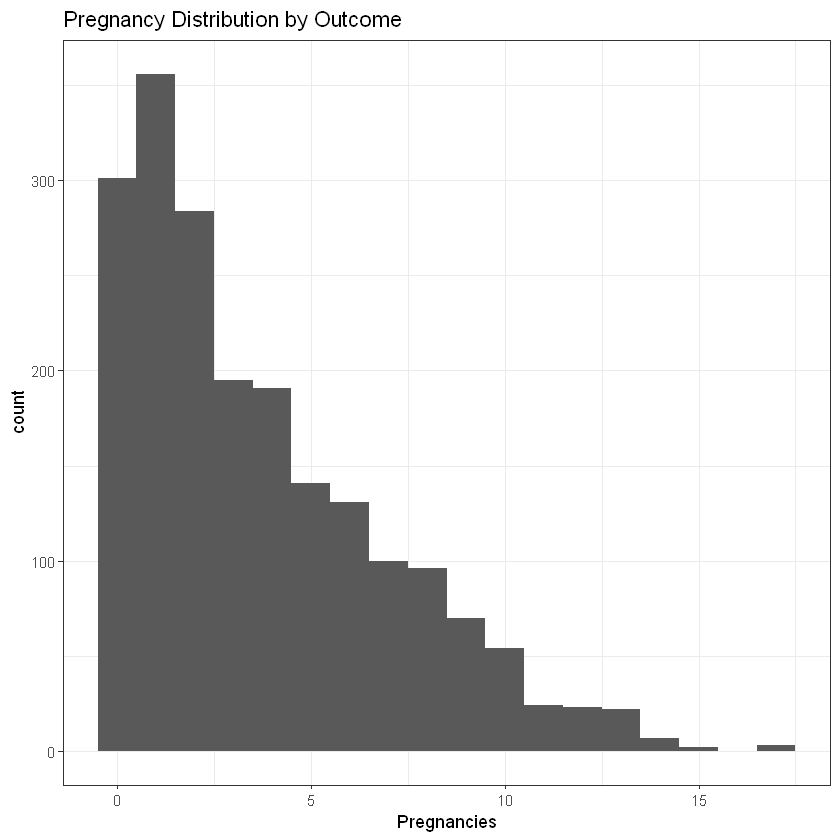

In [13]:
#visual 2
c <- ggplot(diabetes, aes(x=Pregnancies, fill=Outcome, color=Outcome)) +
  geom_histogram(binwidth = 1) + labs(title="Pregnancy Distribution by Outcome")
c + theme_bw()

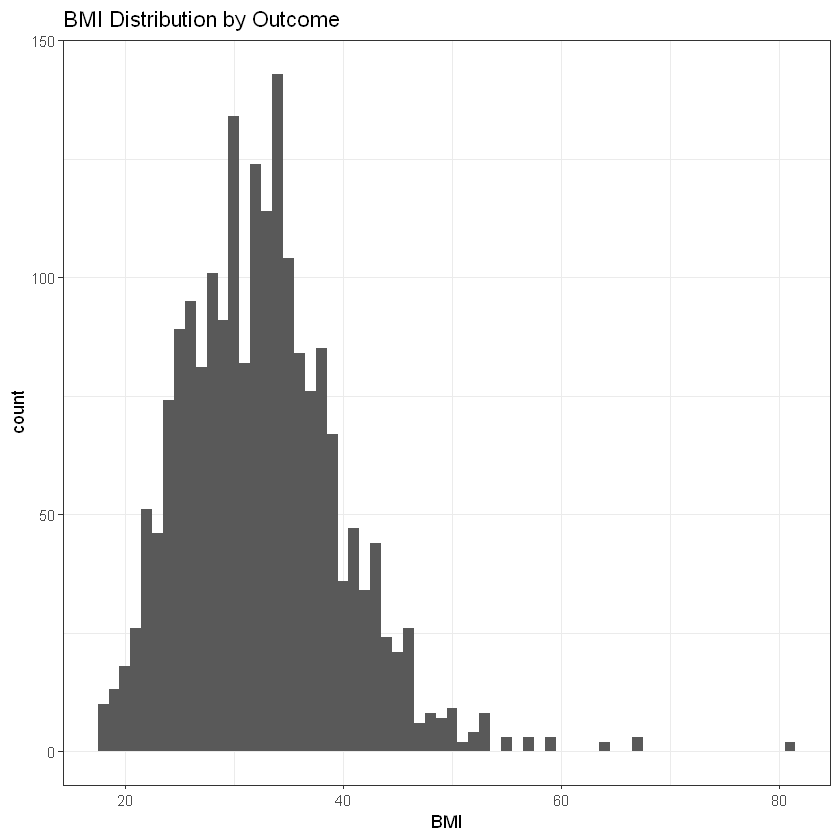

In [14]:
#visual 3
P <- ggplot(diabetes, aes(x=BMI, fill=Outcome, color=Outcome)) +
  geom_histogram(binwidth = 1) + labs(title="BMI Distribution by Outcome")
P + theme_bw()

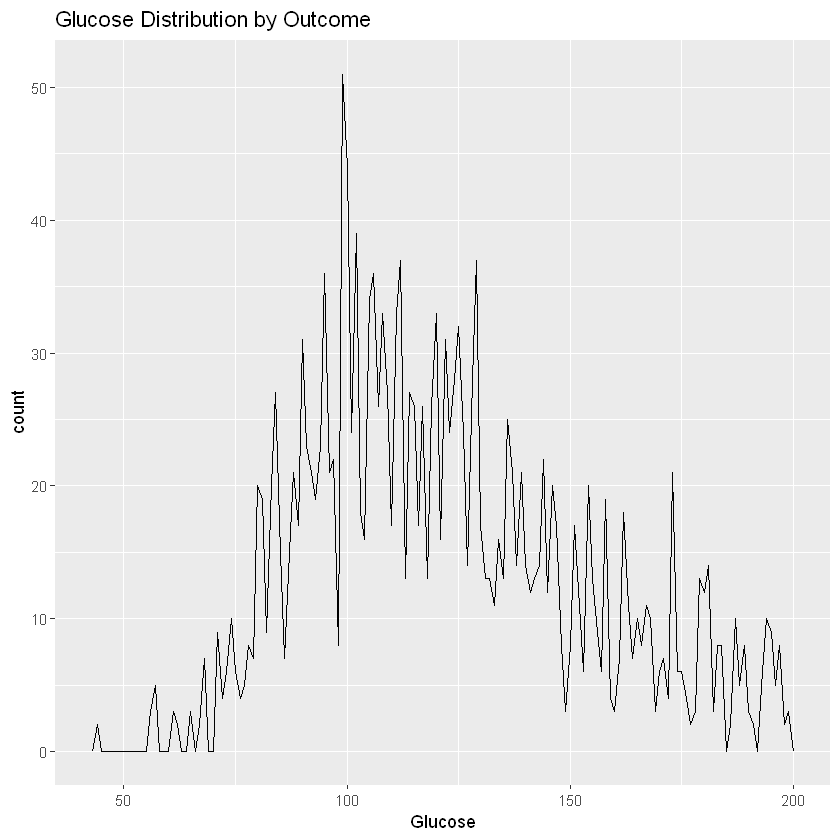

In [15]:
#visual 4
ggplot(diabetes, aes(Glucose, colour = Outcome)) +
  geom_freqpoly(binwidth = 1) + labs(title="Glucose Distribution by Outcome")


In [16]:
#visual 5
ggpairs(diabetes)

ERROR: Error in ggpairs(diabetes): could not find function "ggpairs"


In [17]:
#Building a model
#split data into training and test data sets
library(caret)
set.seed(998)
indxTrain <- createDataPartition(y = diabetes$Outcome,p = 0.75,list = FALSE)
training <- diabetes[indxTrain,]
testing <- diabetes[-indxTrain,]

In [18]:
#Check dimensions of the split

prop.table(table(diabetes$Outcome)) * 100
prop.table(table(training$Outcome)) * 100
prop.table(table(testing$Outcome)) * 100


   0    1 
65.8 34.2 


       0        1 
65.73333 34.26667 


 0  1 
66 34 

In [28]:
#create objects x which holds the predictor variables and y 
#which holds the response variables
x = training[,-9]
y = as.factor(training$Outcome)

In [29]:
model = train(x,y,'naive_bayes')
#?naive_bayes

In [30]:
#Model Evaluation
#Predict testing set
Predict <- predict(model,newdata = testing )

In [32]:
#Get the confusion matrix to see accuracy value and other parameter values

confusionMatrix(Predict, as.factor(testing$Outcome) )

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 264  45
         1  66 125
                                         
               Accuracy : 0.778          
                 95% CI : (0.739, 0.8137)
    No Information Rate : 0.66           
    P-Value [Acc > NIR] : 5.433e-09      
                                         
                  Kappa : 0.5197         
                                         
 Mcnemar's Test P-Value : 0.05765        
                                         
            Sensitivity : 0.8000         
            Specificity : 0.7353         
         Pos Pred Value : 0.8544         
         Neg Pred Value : 0.6545         
             Prevalence : 0.6600         
         Detection Rate : 0.5280         
   Detection Prevalence : 0.6180         
      Balanced Accuracy : 0.7676         
                                         
       'Positive' Class : 0              
                                         

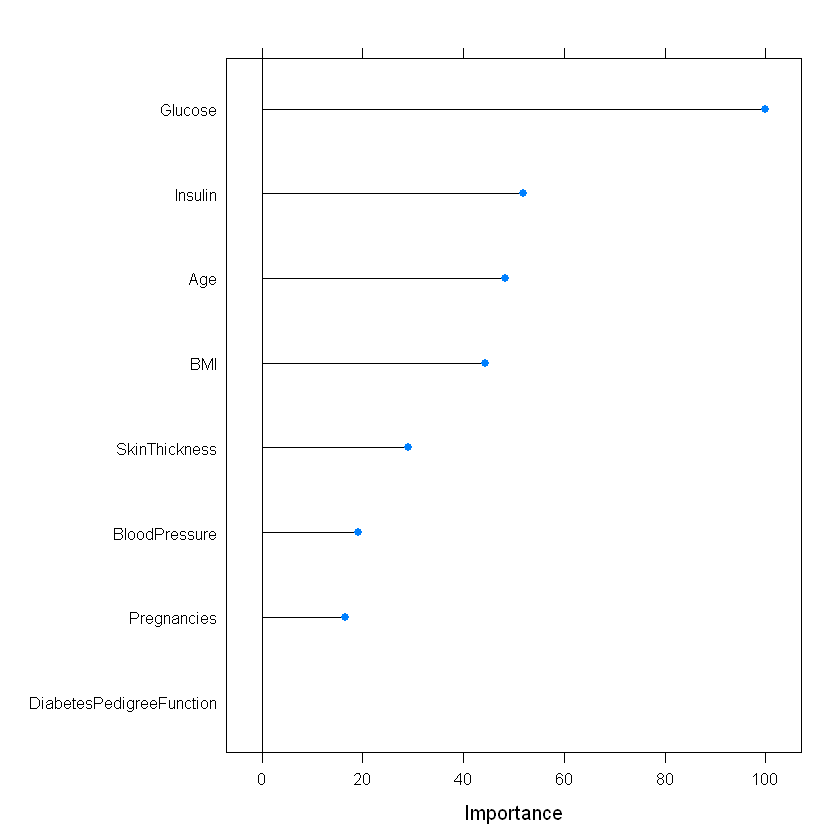

In [33]:
#Plot Variable performance
X <- varImp(model)
plot(X)